In [1]:
# importing dependencies 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [9]:
#understanding the dataset 
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [12]:
#access data attribute 
dataset = boston.data
for name , index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [13]:
#reshaping the data
data = dataset[:,12].reshape(-1,1)

In [14]:
#shape of the data 
np.shape(dataset)


(506, 13)

In [15]:
#Target values
target = boston.target.reshape(-1,1)

In [16]:
#shape of target
np.shape(target)

(506, 1)

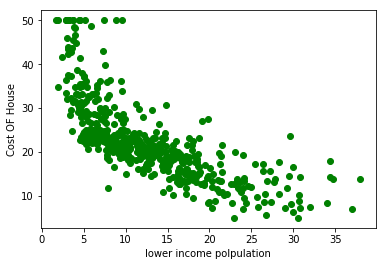

In [19]:
#ensuring matplot is working inside the notebook
%matplotlib inline
plt.scatter(data,target,color='green')
plt.xlabel('lower income polpulation')
plt.ylabel('Cost OF House')
plt.show()

In [32]:
#regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#creating a regression model 
reg = LinearRegression()
reg1 = Lasso()
reg2 = Ridge()

#fit the model 
reg.fit(data,target)
reg1.fit(data,target)
reg2.fit(data,target)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
#prediction
pred = reg.predict(data)
pred1 = reg1.predict(data)
pred2 = reg2.predict(data)

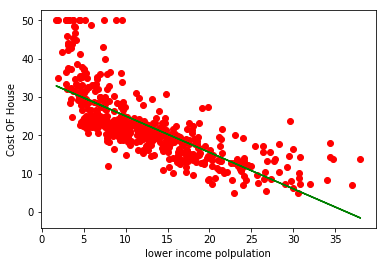

In [38]:
#Plotting the Linear regression
%matplotlib inline
plt.scatter(data,target,color='red')
plt.plot(data,pred,color='green')

plt.xlabel('lower income polpulation')
plt.ylabel('Cost OF House')

plt.show()

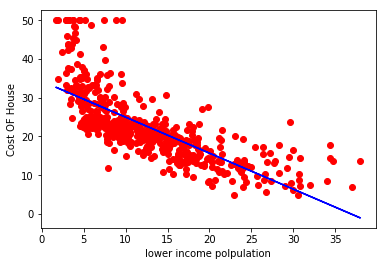

In [36]:
#plotting the lasso regression
%matplotlib inline
plt.scatter(data,target,color='red')
plt.plot(data,pred1,color='blue')

plt.xlabel('lower income polpulation')
plt.ylabel('Cost OF House')
plt.show()

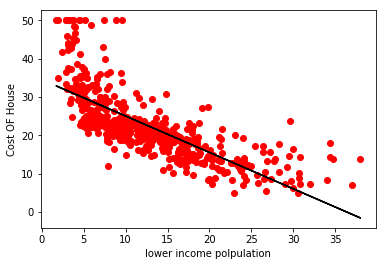

In [37]:
#plotting the ridge regression
%matplotlib inline
plt.scatter(data,target,color='red')
plt.plot(data,pred2,color='black')

plt.xlabel('lower income polpulation')
plt.ylabel('Cost OF House')
plt.show()

In [42]:
#circumventing the curve lines using polynomial model s
from sklearn.preprocessing import PolynomialFeatures

#to allow merging of models 
from sklearn.pipeline import make_pipeline

In [63]:
model = make_pipeline(PolynomialFeatures(3),reg)


In [64]:
model.fit(data,target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [65]:
pred = model.predict(data)


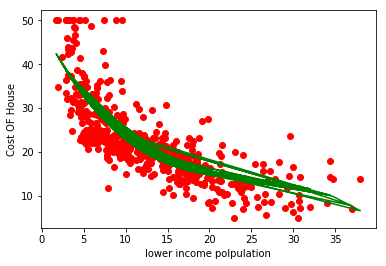

In [66]:
#plotting the ridge regression
%matplotlib inline
plt.scatter(data, target, color='red')
plt.plot( data, pred, color='green')

plt.xlabel('lower income polpulation')
plt.ylabel('Cost OF House')
plt.show()

In [69]:
#r_2 metric 
from sklearn.metrics import r2_score



In [71]:
#predict
r2_score(pred,target)

0.47989118102755735